In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import sabr  #import sabr analyticss in another Python file
reload(sabr) #make sure we are using the latest version
%matplotlib inline  

In [2]:
f = 10 # forward price
t = 1  # time to maturity
lower_bound = 4
upper_bound = 18
k = np.arange(lower_bound, upper_bound, 0.5)   #range of strikes

# Computing SABR implied volatilities with different $\alpha_0$

In [3]:
#sabr parameters
beta = 0.5
rho = -0.5
volvol = 0.4

sabr_ivol_0 = [sabr.sabr_lognormal_vol(k[i], f, t, 0.2, beta, rho, volvol) for i in range(len(k))] #alpha0 = 0.2
sabr_ivol_1 = [sabr.sabr_lognormal_vol(k[i], f, t, 0.3, beta, rho, volvol) for i in range(len(k))] #alpha0 = 0.3
sabr_ivol_2 = [sabr.sabr_lognormal_vol(k[i], f, t, 0.4, beta, rho, volvol) for i in range(len(k))] #alpha0 = 0.4

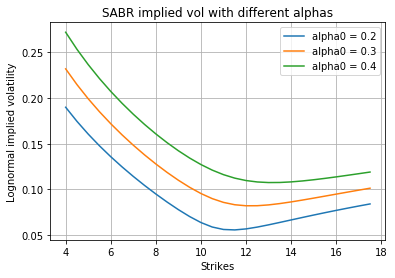

In [5]:
plt1, = plt.plot(k, sabr_ivol_0, label="alpha0 = 0.2")
plt2, = plt.plot(k, sabr_ivol_1, label="alpha0 = 0.3")
plt3, = plt.plot(k, sabr_ivol_2, label="alpha0 = 0.4")

plt.legend(handles=[plt1, plt2, plt3])

plt.xlabel('Strikes')
plt.ylabel('Lognormal implied volatility')
plt.title('SABR implied vol with different alphas')
plt.grid(True)
plt.show()

# Computing SABR implied volatilities with different $\beta$

In [6]:
#sabr parameters
alpha0 = 0.2
rho = 0.3
volvol = 0.4 

sabr_ivol_0 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, 0.1, rho, volvol) for i in range(len(k))] #beta = 0.1
sabr_ivol_1 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, 0.3, rho, volvol) for i in range(len(k))] #beta = 0.3
sabr_ivol_2 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, 0.5, rho, volvol) for i in range(len(k))] #beta = 0.5

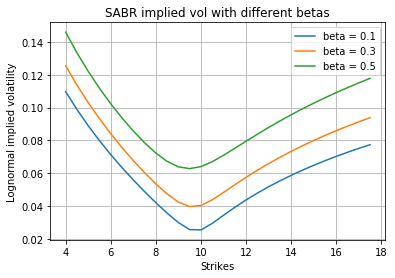

In [7]:
plt1, = plt.plot(k, sabr_ivol_0, label="beta = 0.1")
plt2, = plt.plot(k, sabr_ivol_1, label="beta = 0.3")
plt3, = plt.plot(k, sabr_ivol_2, label="beta = 0.5")

plt.legend(handles=[plt1, plt2, plt3])

plt.xlabel('Strikes')
plt.ylabel('Lognormal implied volatility')
plt.title('SABR implied vol with different betas')
plt.grid(True)
plt.show()

# Computing SABR implied vols with different $\beta$ with adjusted $\alpha_0$

In [8]:
#sabr parameters
rho = 0.3
volvol = 0.4 

# atm lognormal volatility
atm_ln_vol = 0.1

#find the adjusted alpha0 such that the atm lognormal vols are the same
alpha0_0 = sabr.find_alpha(atm_ln_vol, f, t, 0.1, rho, volvol) #beta = 0.1
alpha0_1 = sabr.find_alpha(atm_ln_vol, f, t, 0.3, rho, volvol) #beta = 0.3
alpha0_2 = sabr.find_alpha(atm_ln_vol, f, t, 0.5, rho, volvol) #beta = 0.5

sabr_ivol_0 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0_0, 0.1, rho, volvol) for i in range(len(k))] #beta = 0.1
sabr_ivol_1 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0_1, 0.3, rho, volvol) for i in range(len(k))] #beta = 0.3
sabr_ivol_2 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0_2, 0.5, rho, volvol) for i in range(len(k))] #beta = 0.5

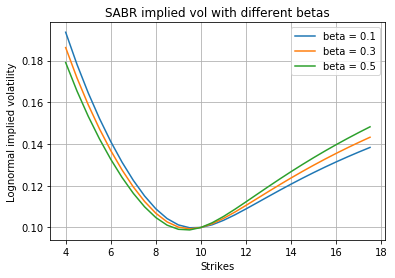

In [9]:
plt1, = plt.plot(k, sabr_ivol_0, label="beta = 0.1")
plt2, = plt.plot(k, sabr_ivol_1, label="beta = 0.3")
plt3, = plt.plot(k, sabr_ivol_2, label="beta = 0.5")

plt.legend(handles=[plt1, plt2, plt3])

plt.xlabel('Strikes')
plt.ylabel('Lognormal implied volatility')
plt.title('SABR implied vol with different betas')
plt.grid(True)
plt.show()

# Computing SABR implied vols with different $\rho$

In [10]:
#sabr parameters
alpha0 = 0.3
beta = 1
volvol = 0.

sabr_ivol_0 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, beta, -0.1, volvol) for i in range(len(k))] #rho = -0.1
sabr_ivol_1 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, beta, -0.5, volvol) for i in range(len(k))] #rho = -0.5
sabr_ivol_2 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, beta, -0.9, volvol) for i in range(len(k))] #rho = -0.9

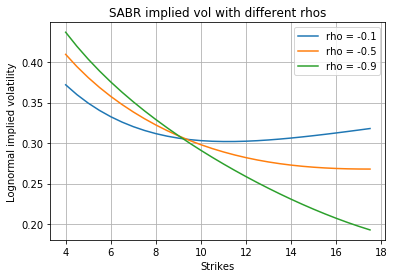

In [12]:
plt1, = plt.plot(k, sabr_ivol_0, label="rho = -0.1")
plt2, = plt.plot(k, sabr_ivol_1, label="rho = -0.5")
plt3, = plt.plot(k, sabr_ivol_2, label="rho = -0.9")

plt.legend(handles=[plt1, plt2, plt3])

plt.xlabel('Strikes')
plt.ylabel('Lognormal implied volatility')
plt.title('SABR implied vol with different rhos')
plt.grid(True)
plt.show()

# Computing SABR implied vols with different $\nu$

In [13]:
#sabr parameters
alpha0 = 0.4
beta = 0.5
rho = -0.5

sabr_ivol_0 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, beta, rho, 0.1) for i in range(len(k))] #nu = 0.1 
sabr_ivol_1 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, beta, rho, 0.4) for i in range(len(k))] #nu = 0.4 
sabr_ivol_2 = [sabr.sabr_lognormal_vol(k[i], f, t, alpha0, beta, rho, 0.8) for i in range(len(k))] #nu = 0.8 

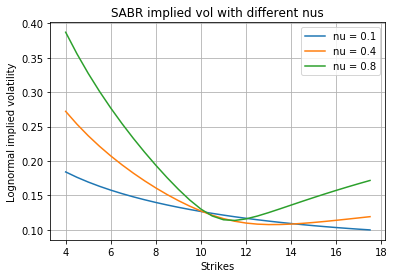

In [14]:
plt1, = plt.plot(k, sabr_ivol_0, label="nu = 0.1")
plt2, = plt.plot(k, sabr_ivol_1, label="nu = 0.4")
plt3, = plt.plot(k, sabr_ivol_2, label="nu = 0.8")

plt.legend(handles=[plt1, plt2, plt3])

plt.xlabel('Strikes')
plt.ylabel('Lognormal implied volatility')
plt.title('SABR implied vol with different nus')
plt.grid(True)
plt.show()